# K-means & Hierarchical clustering

## Importing librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Reading the CSV file 

In [3]:
ccDf = pd.DataFrame(pd.read_csv('CC GENERAL.csv'))
ccDf.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Preprocessing phase

### Finding the missing informations

In [4]:
ccDf.isnull().sum()*100/ccDf.shape[0]

CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.011173
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    3.497207
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

we will replace the missing values in the 'MINIMUM_PAYMENTS' column with the median  and the 'CREDIT_LIMIT' with its mean:

In [5]:
ccDf['MINIMUM_PAYMENTS'].fillna(ccDf['MINIMUM_PAYMENTS'].median(),inplace=True)
ccDf['CREDIT_LIMIT'].fillna(ccDf['CREDIT_LIMIT'].mean(),inplace=True)

### Checking if data is ready to be treated 

In [6]:
ccDf.isnull().sum()*100/ccDf.shape[0]

CUST_ID                             0.0
BALANCE                             0.0
BALANCE_FREQUENCY                   0.0
PURCHASES                           0.0
ONEOFF_PURCHASES                    0.0
INSTALLMENTS_PURCHASES              0.0
CASH_ADVANCE                        0.0
PURCHASES_FREQUENCY                 0.0
ONEOFF_PURCHASES_FREQUENCY          0.0
PURCHASES_INSTALLMENTS_FREQUENCY    0.0
CASH_ADVANCE_FREQUENCY              0.0
CASH_ADVANCE_TRX                    0.0
PURCHASES_TRX                       0.0
CREDIT_LIMIT                        0.0
PAYMENTS                            0.0
MINIMUM_PAYMENTS                    0.0
PRC_FULL_PAYMENT                    0.0
TENURE                              0.0
dtype: float64

In [7]:
ccDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

 So we will drop the customer id columns as it's a categorical feature and does not affect our model results.
Then we'll normalize the data and bring all the variables to the same scale

In [8]:
CCDf = ccDf.drop(["CUST_ID"], axis=1)

In [9]:
CCDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

There is no missing values, and all data are numerical, so data is ready o be treated.

### Some visualization

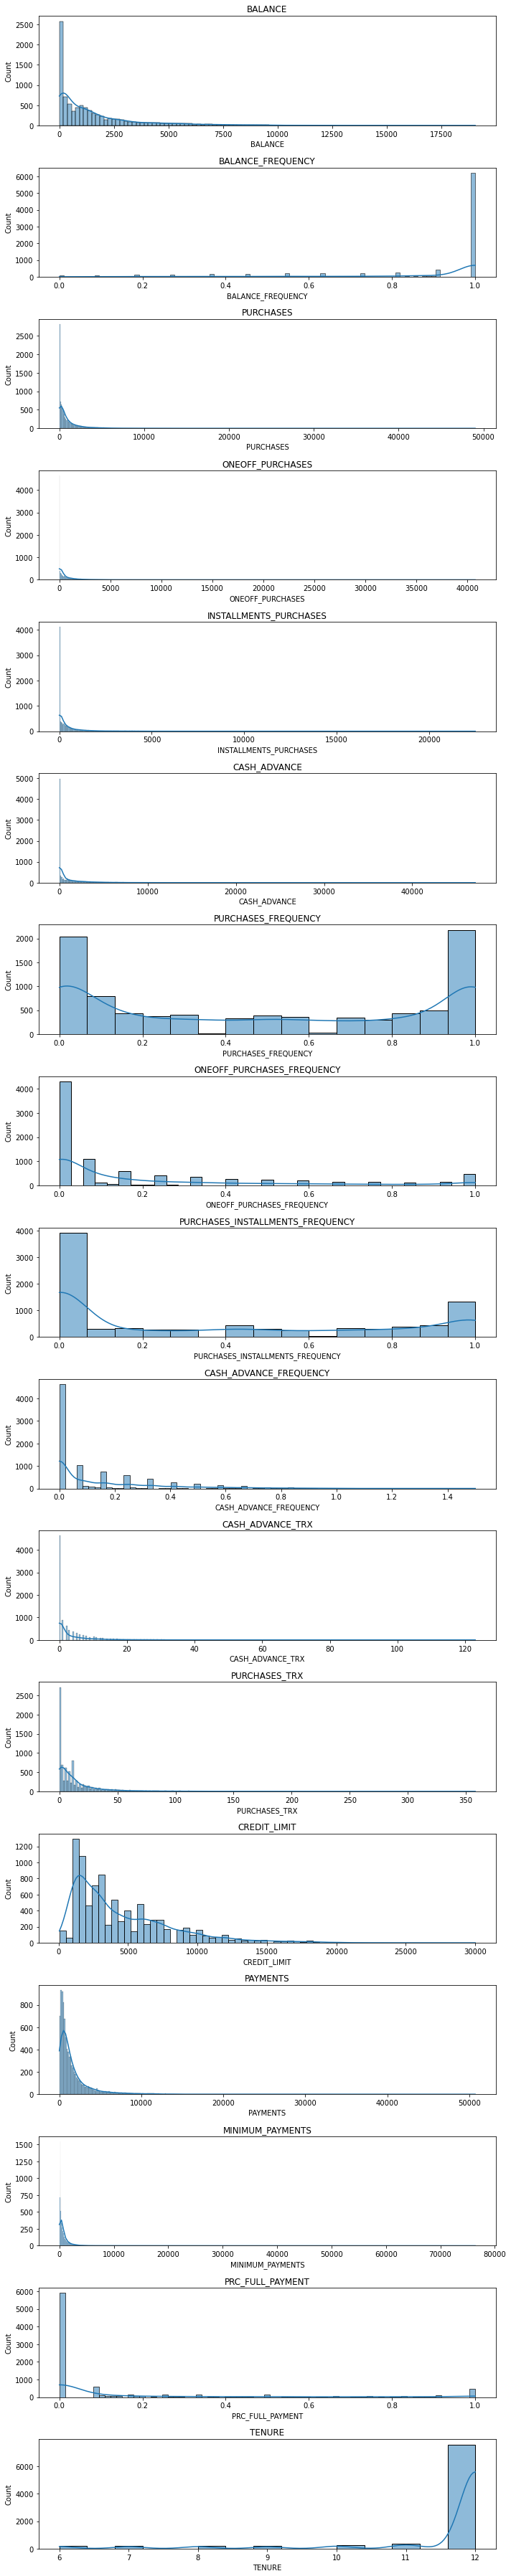

In [10]:
plt.figure(figsize=(10,50))
for i in range(len(CCDf.columns)):
    plt.subplot(17, 1, i+1)
    sns.histplot(data=CCDf[CCDf.columns[i]], kde=True)
    plt.title(CCDf.columns[i])

plt.tight_layout()

### Let's plot a correlation heat map 

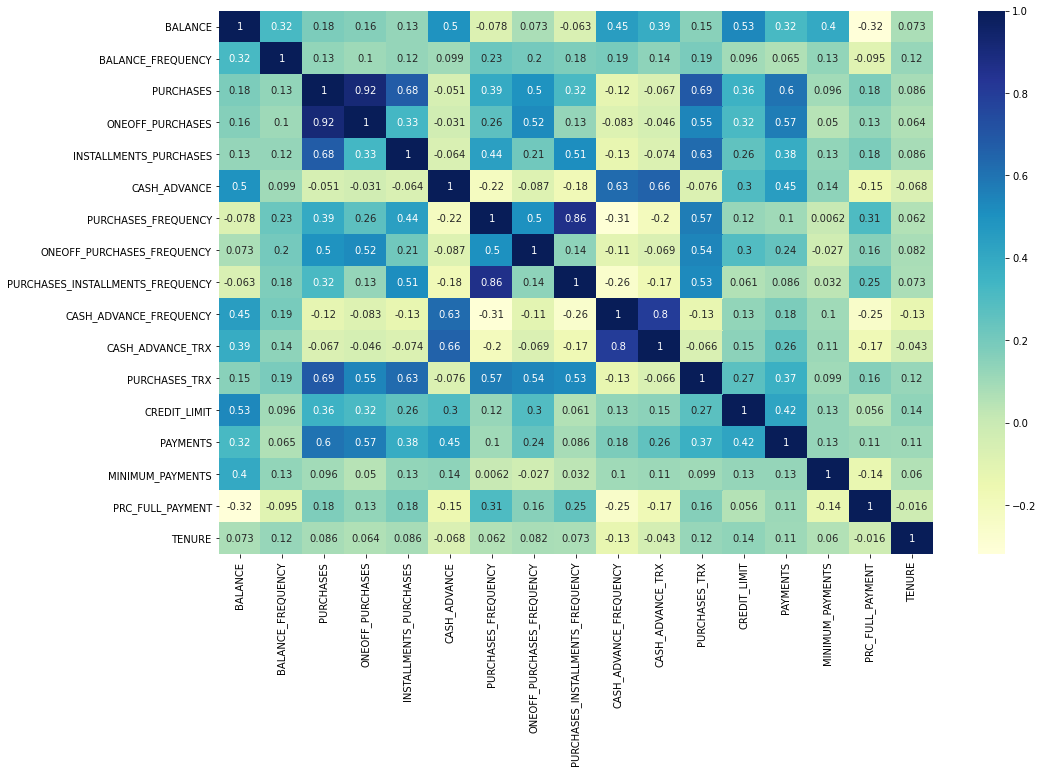

In [11]:
plt.figure(figsize = (16, 10))
sns.heatmap(CCDf.corr(), annot = True, cmap="YlGnBu")
plt.show()

From the results, we can see 3 pairs of strong correlation:
- "PURCHASES" and "ONEOFF_PURCHASS" : 0.92
- "PURCHASES_FREQUENCY" and "PURCHASES_INSTALLMENT_FREQUENCY" : 0.86
- "CASH_ADVANCE_TRX" and "CASH_ADVANCE_FREQUENCY" : 0.8

### Using hierarchical clustering to identify the inherent groupings within our data

Let's normalize the data and bring all the variables to the same scale

In [12]:
from sklearn.preprocessing import normalize
CCDf_scaled = normalize(CCDf)
CCDf_scaled = pd.DataFrame(CCDf_scaled, columns=CCDf.columns)
CCDf_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.039353,0.000787,0.091790,0.000000,0.09179,0.000000,0.000160,0.000000,0.00008,0.000000,0.000000,0.001924,0.962156,0.194165,0.134230,0.00000,0.011546
1,0.293876,0.000083,0.000000,0.000000,0.00000,0.591240,0.000000,0.000000,0.00000,0.000023,0.000367,0.000000,0.642358,0.376516,0.098404,0.00002,0.001101
2,0.310798,0.000125,0.096307,0.096307,0.00000,0.000000,0.000125,0.000125,0.00000,0.000000,0.000000,0.001495,0.934206,0.077485,0.078135,0.00000,0.001495
3,0.208886,0.000080,0.187872,0.187872,0.00000,0.025792,0.000010,0.000010,0.00000,0.000010,0.000125,0.000125,0.939987,0.000000,0.039147,0.00000,0.001504
4,0.504284,0.000617,0.009867,0.009867,0.00000,0.000000,0.000051,0.000051,0.00000,0.000000,0.000000,0.000617,0.740040,0.418329,0.150963,0.00000,0.007400


### Applying hierarchical  clustering

In [104]:
from sklearn.cluster import AgglomerativeClustering 
model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(CCDf_scaled)

Now we can print each point’s corresponding cluster.

In [105]:
agglomerative=pd.DataFrame(clust_labels)
agglomerative.head()

,0
0,0
1,1
2,0
3,0
4,0


### Ploting the clusters

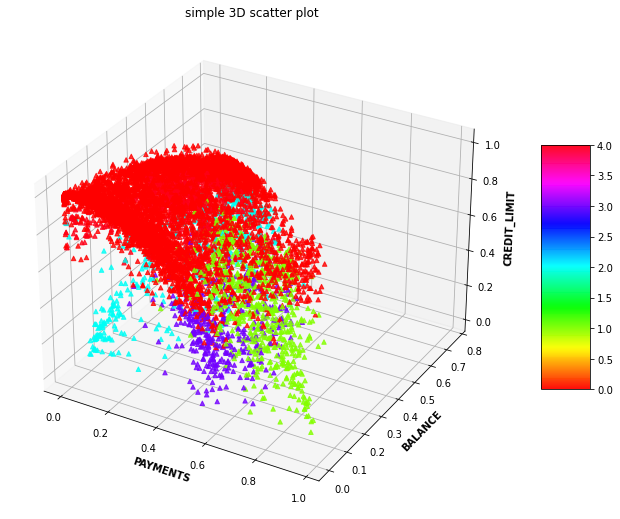

In [115]:
from mpl_toolkits import mplot3d 

fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)

my_cmap = plt.get_cmap('hsv')
 
sctt = ax.scatter3D(CCDf_scaled['PAYMENTS'] ,  CCDf_scaled['BALANCE'], CCDf_scaled['CREDIT_LIMIT'],
                    alpha = 0.8,
                    c = agglomerative[0],
                    cmap = my_cmap,
                    marker ='^')
 
plt.title("simple 3D scatter plot")
ax.set_xlabel('PAYMENTS', fontweight ='bold')
ax.set_ylabel('BALANCE', fontweight ='bold')
ax.set_zlabel('CREDIT_LIMIT', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
 
plt.show()

From the plot below we can describe our five diffrent cluster :
 - cluster 1 (The Orange one) : This cluster contain pepole who have a high balance, a low amount of Payment and a high Limit of Credit Card.
 - cluster 2 (The Green one) : This cluster contain pepole who have a normal balance, a hight amount of payment and a low credit limit. (a target)
 - cluster 3 (The Cyan one) :  This cluster contain pepole who have a low balance, a low amount of payment and a low credit limit.
 - cluster 4 (The Purpule one) : This cluster contain pepole who have normal balance , a normal amount of payment and a low credit limt
 - cluster 5 (The Red one) : This cluster contain pepole who have a low balance, a low amount of payment and a high credit limit

### Ploting the dendrogram

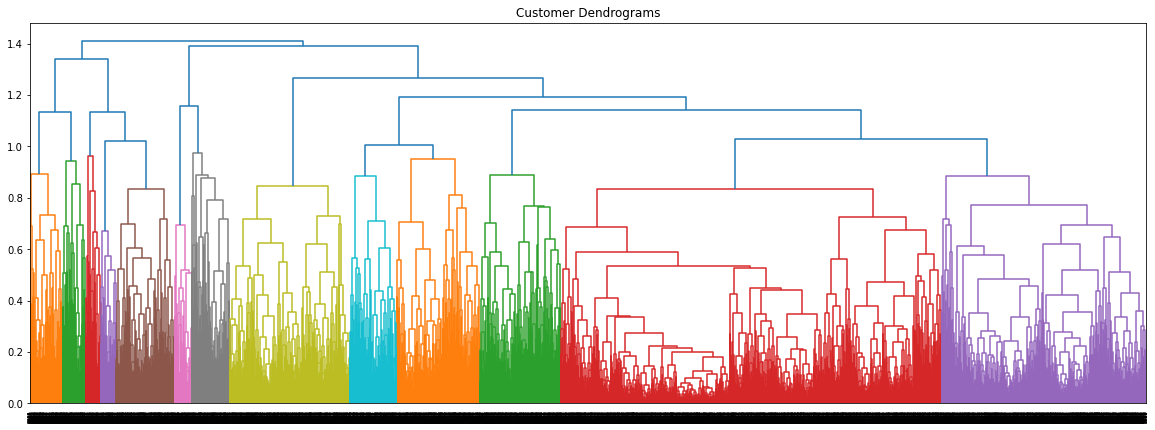

In [116]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(20,7))
plt.title("Customer Dendrograms")
plt.axhline(y=10, color='r', linestyle='--')
dend=shc.dendrogram(shc.linkage(CCDf_scaled, method="complete"))

### Using the k-means clustering

In [127]:
from sklearn.cluster import KMeans  
kmeans=KMeans(n_clusters=5, random_state=0)  
kmeans.fit(CCDf_scaled)

KMeans(n_clusters=5, random_state=0)

Now we can print each point’s corresponding cluster.

In [128]:
labels=pd.DataFrame(kmeans.labels_)
labels.head()

,0
0,2
1,3
2,2
3,2
4,1


### Showing the clusters centeroieds

In [201]:
kmeans.predict(CCDf_scaled)
print(kmeans.cluster_centers_) 

[[1.54598696e-01 2.44421350e-04 4.43771998e-01 2.60487382e-01
  1.83462122e-01 2.62545704e-02 2.04878230e-04 8.97953866e-05
  1.50824362e-04 9.46167380e-06 1.73758057e-04 6.18908109e-03
  6.03081471e-01 4.00603218e-01 8.39457694e-02 7.31319316e-05
  3.04871849e-03]
 [5.61943032e-01 3.00058942e-04 8.32293179e-02 4.71439485e-02
  3.61231568e-02 1.05736503e-01 8.67066305e-05 3.31384771e-05
  5.99860644e-05 4.31886791e-05 7.57352025e-04 1.83796557e-03
  7.20617115e-01 1.90877186e-01 2.10434150e-01 1.15722081e-07
  3.55170432e-03]
 [2.29016293e-01 2.10682842e-04 6.85881750e-02 3.88301590e-02
  2.97637259e-02 3.65011573e-01 5.85112514e-05 2.26952652e-05
  3.96293669e-05 5.84842908e-05 1.41408123e-03 1.30320189e-03
  5.23094184e-01 6.33269216e-01 1.05830903e-01 3.09677292e-05
  2.91680229e-03]
 [3.70235914e-01 2.30706517e-04 4.12253987e-02 2.38535288e-02
  1.73765865e-02 5.02234037e-01 4.77545865e-05 1.62647077e-05
  3.15305937e-05 8.06554746e-05 1.81959484e-03 8.04702059e-04
  7.07561088e-01

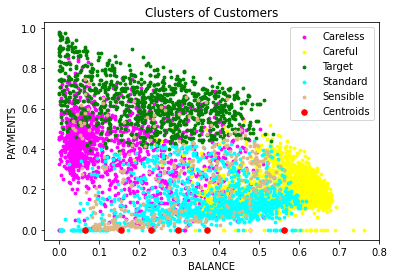

In [197]:
plt.scatter(CCDf_scaled["BALANCE"][kmeans.labels_ == 0],          
            CCDf_scaled["PAYMENTS"][kmeans.labels_ == 0],s=8,c='magenta',label='Careless')
plt.scatter(CCDf_scaled["BALANCE"][kmeans.labels_ == 1],
           CCDf_scaled["PAYMENTS"][kmeans.labels_ == 1],s=8,c='yellow',label='Careful')
plt.scatter(CCDf_scaled["BALANCE"][kmeans.labels_ == 2],
           CCDf_scaled["PAYMENTS"][kmeans.labels_ == 2],s=8,c='green',label='Target')
plt.scatter(CCDf_scaled["BALANCE"][kmeans.labels_ == 3], 
           CCDf_scaled["PAYMENTS"][kmeans.labels_ == 3],s=8,c='cyan',label='Standard')
plt.scatter(CCDf_scaled["BALANCE"][kmeans.labels_ == 4], 
           CCDf_scaled["PAYMENTS"][kmeans.labels_ == 4],s=8,c='burlywood',label='Sensible')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=30, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('BALANCE')
plt.ylabel('PAYMENTS')
plt.legend()
plt.show()

### Trying a different k values and select the best one

In [159]:
Sum_of_squarted_distances = []
i = []
K = range(1,15)
for k in K: 
    km = KMeans(n_clusters=k)
    km = km.fit(CCDf_scaled)
    Sum_of_squarted_distances.append(km.inertia_)
    i.append(k)

In [166]:
data = {
   'Sum_of_squarted_distances': Sum_of_squarted_distances,
   'clusters': i ,
}

In [170]:
soqdDf = pd.DataFrame(data)
soqdDf.head()

,Sum_of_squarted_distances,clusters
0,2221.091286,1
1,1619.784874,2
2,1242.043578,3
3,1017.328521,4
4,876.339269,5


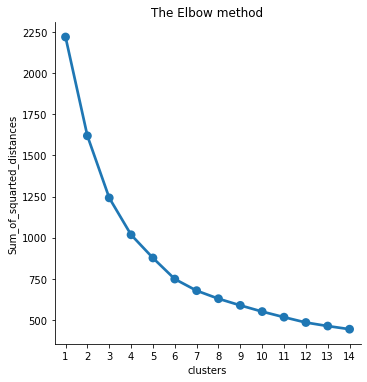

In [173]:
sns.catplot(y="Sum_of_squarted_distances", x="clusters", kind="point", data=soqdDf).set(title='The Elbow method')

According to the elbow method we'll choose 6 as a number of cluster.

In [174]:
kmeans=KMeans(n_clusters=6, random_state=0)  
kmeans.fit(CCDf_scaled)

KMeans(n_clusters=6, random_state=0)

In [190]:
labels=pd.DataFrame(kmeans.labels_)
labels.head()

,0
0,5
1,3
2,5
3,5
4,1


### Ploting the clusters

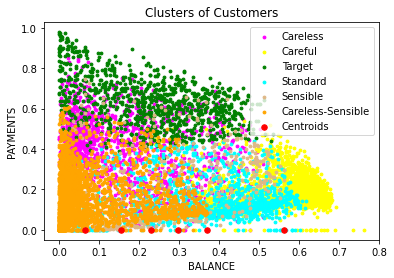

In [200]:
plt.scatter(CCDf_scaled["BALANCE"][kmeans.labels_ == 0],          
            CCDf_scaled["PAYMENTS"][kmeans.labels_ == 0],s=8,c='magenta',label='Careless')
plt.scatter(CCDf_scaled["BALANCE"][kmeans.labels_ == 1],
           CCDf_scaled["PAYMENTS"][kmeans.labels_ == 1],s=8,c='yellow',label='Careful')
plt.scatter(CCDf_scaled["BALANCE"][kmeans.labels_ == 2],
           CCDf_scaled["PAYMENTS"][kmeans.labels_ == 2],s=8,c='green',label='Target')
plt.scatter(CCDf_scaled["BALANCE"][kmeans.labels_ == 3], 
           CCDf_scaled["PAYMENTS"][kmeans.labels_ == 3],s=8,c='cyan',label='Standard')
plt.scatter(CCDf_scaled["BALANCE"][kmeans.labels_ == 4], 
           CCDf_scaled["PAYMENTS"][kmeans.labels_ == 4],s=8,c='burlywood',label='Sensible')
plt.scatter(CCDf_scaled["BALANCE"][kmeans.labels_ == 5], 
           CCDf_scaled["PAYMENTS"][kmeans.labels_ == 5],s=8,c='orange',label='Careless-Sensible')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=30, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('BALANCE')
plt.ylabel('PAYMENTS')
plt.legend()
plt.show()

#### Comparing the tow results

as we can see the second result is more precise than the first one as it highlights a new category the (Careless-Sensible) it people who spend the amount they have in there account and have a low balance (They can be a second target).
